In [1]:

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.

# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:

# 준비된 수술 환자 데이터를 불러들입니다.
Data_set = pd.read_csv("../dataset/ThoraricSurgery.csv")
data_vale=Data_set.values

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
X = data_vale[:,0:17]
Y = data_vale[:,17]


In [3]:

# 전체 데이터에서 학습 데이터와 테스트 데이터(0.2)로 구분
X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.3)


In [4]:

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
input_Layer = tf.keras.layers.Input(shape=(17,))
x = tf.keras.layers.Dense(10, activation='sigmoid',kernel_initializer=tf.keras.initializers.he_normal())(input_Layer) ## he 초기화 방법
x = tf.keras.layers.Dense(10, activation='sigmoid',kernel_initializer=tf.keras.initializers.glorot_uniform())(x) ## xavier 초기화 방법
Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

# 딥러닝을 실행합니다.
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
metrics=tf.keras.metrics.binary_accuracy

model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
result=model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_valid,Y_valid))


print(result.history.keys())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
27/27 [==============================] - 1s 9ms/step - loss: 0.8024 - binary_accuracy: 0.1603 - val_loss: 0.6901 - val_binary_accuracy: 0.3805
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6319 - binary_accuracy: 0.8168 

-----
3/3 [==============================] - 0s 2ms/step - loss: 0.4572 - binary_accuracy: 0.8298
[0.45717307925224304, 0.8297872543334961]
15/15 [==============================] - 0s 2ms/step - loss: 0.4207 - binary_accuracy: 0.8507

 Accuracy: 0.8507


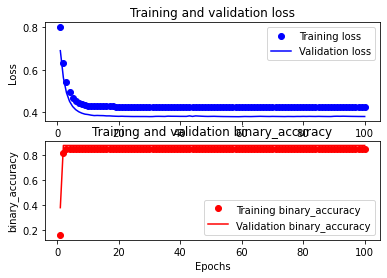

In [5]:

### result에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### result에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
rmse = result.history['binary_accuracy']
val_rmse = result.history['val_binary_accuracy']
epochs = range(1, len(rmse) + 1)
### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training binary_accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation binary_accuracy')
plt.title('Training and validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend()

# 결과를 출력합니다.
print("-----")
print(model.evaluate(X_test, Y_test))
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

plt.show()